In [ ]:
import os 
os.chdir("D:\")

In [3]:
import pandas as pd
data = pd.read_csv("ibb_data.csv")

In [3]:
data.shape

(199932, 11)

In [4]:
data.head()

,ORG_TICKET_ID,TICKET_DESC,SR_AREA,SR_SUB_AREA,SR_SUBTYPE_CD,X_IBB_COUNTY,X_IBB_NEIGHBOURHOOD,preProcessing,totalwords,lang,clean_new
0,1-34788228164,\n\n\nADRES : HEYBELİADA \n\nKONU :\n1...,EKSİK - DETAY BİLGİ,EKSİK - DETAY BİLGİ,Mobil İletişim And. 1.Bölge,ADALAR,HEYBELİADA,adres heybeliada konu heybeli ada ıskele önund...,56,tr,adres heybeliada konu heybeli ada iskele ön ca...
1,1-35460514640,İşe gidiş ve dönüş saatleri için Eminönüne sef...,ŞEHİR HATLARI SEFER HİZMETLERİ,HAT TALEPLERİ,Telefon,ADALAR,HEYBELİADA,işe gidiş dönüş saatleri eminönüne sefer talep...,16,tr,iş git dönüş saat eminönü sefer talep et bir v...
2,1-33993853508,ADALARDA YAPILAN OTOBÜS HATLARIYLA İLGİLİ KULL...,FAYTON,FAYTONLA ULAŞIM YAPILMASI,Telefon,ADALAR,NaN,adalarda yapılan otobüs hatlarıyla ilgili kull...,33,tr,adalar yap otobüs hat ilgili kullanım mevcut f...
3,1-31556148173,Adalar maden mahallesi çınar caddesi numaralar...,KARARLAR,CADDE / SOKAK İSİM VE LEVHA,Muhtar Mobil,ADALAR,MADEN,adalar maden mahallesi çınar caddesi numaralar...,20,tr,adalar maden mahallesi çınar caddesi numara de...
4,1-31146267834,Adalar belediyesinin üzerine düşen görevleri y...,İLÇE PARK BAHÇELER,PARK BAHÇELER,Web,ADALAR,BURGAZADA,adalar belediyesinin üzerine düşen görevleri y...,51,tr,adalar belediye üzeri düş görev yer getirme ad...


# Gensim ve Word2Vec

In [59]:
words = [word.split() for word in data["clean_new"]]
print(words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
import gensim

In [25]:
#Bag of Words ile, 250 boyutlu, 5 kereden daha fazla geçen kelimelerin, 3 kelime önce ve sonrası
w2v_model = gensim.models.Word2Vec(words, size = 256, min_count=10, window=3)

In [26]:
# bunu çalıştırmasan da olur
#vocabulary_of_w2v_model = list(w2v_model.wv.vocab.items())
#print(vocabulary_of_w2v_model)

In [27]:
w2v_model.most_similar("mesela", topn=15)

<ipython-input-27-6a3b1b9ac130>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  w2v_model.most_similar("mesela", topn=15)


[('kavram', 0.6064212322235107),
 ('mantık', 0.6023968458175659),
 ('dimi', 0.5916260480880737),
 ('metrobuslerde', 0.588105320930481),
 ('tarihi', 0.5791565179824829),
 ('mesele', 0.5788992643356323),
 ('tıklımdı', 0.5732263922691345),
 ('l', 0.5730617046356201),
 ('peki', 0.5718985795974731),
 ('riayet', 0.562380313873291),
 ('espresso', 0.5604478120803833),
 ('pes', 0.5592375993728638),
 ('vagonlu', 0.5577795505523682),
 ('buyru', 0.555778443813324),
 ('bike', 0.5529454946517944)]

# K-means clustering

In [24]:
from sklearn.cluster import KMeans

In [29]:
km_model = KMeans(n_clusters=5, max_iter=1000, n_init=50)

In [30]:
w2v_vectors = w2v_model.wv.vectors

In [31]:
km_model.fit(X=w2v_vectors)

KMeans(max_iter=1000, n_clusters=5, n_init=50)

In [32]:
km_model.cluster_centers_

array([[-0.1743826 , -0.01879728, -0.11447869, ...,  0.20604567,
        -0.14675367,  0.01652478],
       [-0.04620121, -0.00769661, -0.1218724 , ...,  0.23643823,
        -0.05287747, -0.06208257],
       [-0.00472266,  0.07225591, -0.10937402, ...,  0.17767431,
        -0.01491485, -0.0533271 ],
       [-0.05066736, -0.07982841, -0.06882866, ...,  0.22208071,
        -0.15579586, -0.00933311],
       [-0.0364007 , -0.0453999 , -0.08318036, ...,  0.18393378,
        -0.19084266, -0.02989684]], dtype=float32)

In [33]:
#birinci cluster'a en yakın 10 kelime
w2v_model.similar_by_vector(km_model.cluster_centers_[0], topn=25, restrict_vocab=None)

<ipython-input-33-35c88cf08865>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  w2v_model.similar_by_vector(km_model.cluster_centers_[0], topn=25, restrict_vocab=None)


[('uydukent', 0.9413530230522156),
 ('talimhane', 0.9379655718803406),
 ('karakutu', 0.9271396398544312),
 ('keyini', 0.9263951182365417),
 ('topak', 0.9222028851509094),
 ('alaçatı', 0.9199303388595581),
 ('monako', 0.919371485710144),
 ('nişangah', 0.9186265468597412),
 ('rumelifeneri', 0.9179848432540894),
 ('koşullu', 0.916930079460144),
 ('yeldeğirmeni', 0.9147658944129944),
 ('altınyıldız', 0.9115120768547058),
 ('akbatu', 0.9113783240318298),
 ('adapte', 0.9101548194885254),
 ('optimum', 0.910110354423523),
 ('viaport', 0.9079424738883972),
 ('marmarapark', 0.9069262742996216),
 ('ardıçlıevler', 0.9056236147880554),
 ('nurtepe', 0.9055894613265991),
 ('buzhane', 0.9054926633834839),
 ('kuşkonmaz', 0.9049890637397766),
 ('şekerpınar', 0.9043858051300049),
 ('alke', 0.9033815860748291),
 ('çukurçeşme', 0.9017496109008789),
 ('nenehatun', 0.9013782739639282)]

In [34]:
#ikinici cluster'a en yakın 10 kelime
w2v_model.similar_by_vector(km_model.cluster_centers_[1], topn=25, restrict_vocab=None)

<ipython-input-34-5a3da06692cd>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  w2v_model.similar_by_vector(km_model.cluster_centers_[1], topn=25, restrict_vocab=None)


[('sunta', 0.8964663147926331),
 ('talaş', 0.892885684967041),
 ('mekruh', 0.8655331134796143),
 ('parmaklık', 0.863849401473999),
 ('pıs', 0.8634582757949829),
 ('alçı', 0.8610329627990723),
 ('çıkıntı', 0.8574414849281311),
 ('eşek', 0.8561070561408997),
 ('yuvarla', 0.8556066751480103),
 ('sulama', 0.8540078401565552),
 ('sulu', 0.8539180755615234),
 ('dercedilmiş', 0.852031946182251),
 ('konvoy', 0.8505640029907227),
 ('muhtelif', 0.846605658531189),
 ('tenha', 0.8441611528396606),
 ('sarkıt', 0.8440079689025879),
 ('kusmuk', 0.8439089059829712),
 ('taht', 0.8415169715881348),
 ('barikat', 0.841455340385437),
 ('saz', 0.840877890586853),
 ('paslan', 0.8405479192733765),
 ('kabuk', 0.8378097414970398),
 ('testere', 0.8356441259384155),
 ('asfaltsız', 0.8352559804916382),
 ('çökme', 0.8348010182380676)]

In [35]:
#ikinici cluster'a en yakın 10 kelime
w2v_model.similar_by_vector(km_model.cluster_centers_[2], topn=25, restrict_vocab=None)

<ipython-input-35-3066f8e66000>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  w2v_model.similar_by_vector(km_model.cluster_centers_[2], topn=25, restrict_vocab=None)


[('talat', 0.9409626722335815),
 ('uysal', 0.9404706954956055),
 ('iettbayrak', 0.9402278065681458),
 ('alparslan', 0.9391646981239319),
 ('seyid', 0.935156524181366),
 ('naşit', 0.9347733855247498),
 ('ezel', 0.9346045851707458),
 ('bestekar', 0.9341840147972107),
 ('uygur', 0.933793306350708),
 ('mihriban', 0.9319195747375488),
 ('tülin', 0.9291466474533081),
 ('özmen', 0.9279005527496338),
 ('adile', 0.9277584552764893),
 ('gümüşhane', 0.9277567863464355),
 ('özalp', 0.9267444610595703),
 ('sultantepe', 0.9267231225967407),
 ('semih', 0.9265117645263672),
 ('kabaklı', 0.9235644340515137),
 ('peker', 0.922283411026001),
 ('hulusi', 0.9214751720428467),
 ('nene', 0.9214290380477905),
 ('akça', 0.920814037322998),
 ('akkaya', 0.9172056913375854),
 ('kadırga', 0.9171544313430786),
 ('halaskargazi', 0.9160920977592468)]

In [36]:
#ikinici cluster'a en yakın 10 kelime
w2v_model.similar_by_vector(km_model.cluster_centers_[3], topn=25, restrict_vocab=None)

<ipython-input-36-a59af8debbdb>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  w2v_model.similar_by_vector(km_model.cluster_centers_[3], topn=25, restrict_vocab=None)


[('dalgın', 0.8665345907211304),
 ('değme', 0.8591612577438354),
 ('anlayışlı', 0.8589837551116943),
 ('arbede', 0.8555882573127747),
 ('önemsema', 0.8540812730789185),
 ('diyin', 0.8538942337036133),
 ('vahim', 0.851271390914917),
 ('şerefsiz', 0.8502939939498901),
 ('sorumsız', 0.847193717956543),
 ('bunca', 0.8465176820755005),
 ('sızı', 0.8462520837783813),
 ('gerçi', 0.8461122512817383),
 ('alındı', 0.8432831764221191),
 ('daim', 0.8415541648864746),
 ('önemseme', 0.8397413492202759),
 ('suçlu', 0.8394750356674194),
 ('vaki', 0.838164210319519),
 ('yanlı', 0.837965726852417),
 ('zevk', 0.8345716595649719),
 ('sebepsiz', 0.8339129686355591),
 ('zulüm', 0.8331221342086792),
 ('defol', 0.8308907747268677),
 ('sıkayetcı', 0.8306030035018921),
 ('ula', 0.8304123878479004),
 ('sırala', 0.8289484977722168)]

In [37]:
#ikinici cluster'a en yakın 10 kelime
w2v_model.similar_by_vector(km_model.cluster_centers_[4], topn=25, restrict_vocab=None)

<ipython-input-37-c61af60f9561>:2: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  w2v_model.similar_by_vector(km_model.cluster_centers_[4], topn=25, restrict_vocab=None)


[('basur', 0.8861607313156128),
 ('bili', 0.8541551232337952),
 ('öç', 0.8519554734230042),
 ('mühim', 0.8486981987953186),
 ('sözleş', 0.8454754948616028),
 ('askıdafatura', 0.8405461311340332),
 ('taklit', 0.8390271663665771),
 ('ayin', 0.8383980393409729),
 ('sunu', 0.8375591039657593),
 ('ekstre', 0.836866021156311),
 ('iyigün', 0.836005687713623),
 ('başvurulu', 0.8329751491546631),
 ('aktifme', 0.8288200497627258),
 ('seci', 0.8281835913658142),
 ('cevabi', 0.8281323909759521),
 ('kişime', 0.8277691006660461),
 ('rahim', 0.8277209401130676),
 ('sorgulama', 0.8242924213409424),
 ('kontur', 0.8227672576904297),
 ('öğrenma', 0.8226035237312317),
 ('yönlenma', 0.8210197687149048),
 ('bakı', 0.8198291063308716),
 ('geridönüş', 0.8191761374473572),
 ('gönderi', 0.81833815574646),
 ('oyla', 0.8160693645477295)]

In [26]:
import matplotlib.pyplot as plt

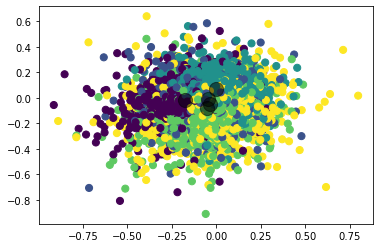

In [39]:
#görselleme
y_kmeans = km_model.predict(w2v_vectors)

plt.scatter(w2v_vectors[:, 0], w2v_vectors[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [40]:
km_model.inertia_

36110.85546875

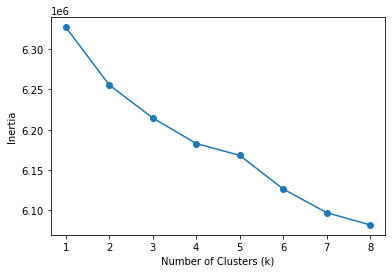

In [32]:
num_clusters = list(range(1,9))
inertias = []

for k in num_clusters:
  model = KMeans(n_clusters=k)
  model.fit(w2v_vectors)
  inertias.append(model.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()